In [1]:
from fastai.vision.all import *

In [2]:
path=untar_data(URLs.MNIST)

In [4]:
path

Path('D:/DLLibLocation/.fastai/data/mnist_png')

In [5]:
doc(get_image_files)

In [6]:
items=get_image_files(path)

In [7]:
items

(#70000) [Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/10.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1001.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1009.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/101.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1034.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1047.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1061.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1084.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1094.png'),Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/1121.png')...]

In [8]:
items[0]

Path('D:/DLLibLocation/.fastai/data/mnist_png/testing/0/10.png')

In [9]:
im=PILImageBW.create(items[0])

<AxesSubplot:>

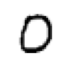

In [10]:
im.show()

GrandparentSplitter used when we have folders having train and test imgs

In [11]:
splits=GrandparentSplitter(train_name='training',valid_name='testing') # crested splits item. Didn't split actual data yet

In [12]:
#splitting items
splits=splits(items)

In [13]:
type(splits)

tuple

In [14]:
doc(Datasets)

In [15]:
dsrc=Datasets(items,tfms=[[PILImageBW.create],[parent_label,Categorize]],
             splits=splits) #how do we want our inputs to come in and how do we expect our y's to be formed

<AxesSubplot:title={'center':'0'}>

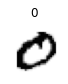

In [16]:
show_at(dsrc.train,6)

In [17]:
tfms=[ToTensor(),CropPad(size=34,pad_mode=PadMode.Zeros),RandomCrop(size=28)]
# go left to right...convert to tnsor, crop pad and then cropeed again
# this is  an instance of gpu and batch tfms
# this is item tfms used for batch tfms

In [18]:
gpu_tfms=[IntToFloatTensor(),Normalize()]

In [19]:
dbunch=dsrc.dataloaders(bs=128,after_item=tfms,after_batch=gpu_tfms,num_workers=0)

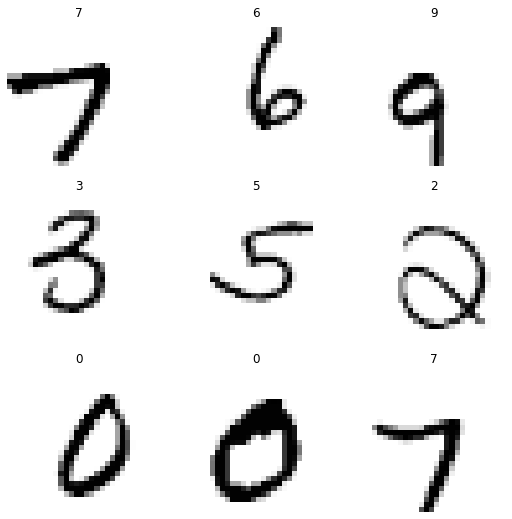

In [20]:
dbunch.show_batch()

In [21]:
xb,yb=dbunch.one_batch()

In [22]:
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [23]:
dbunch.bs

128

In [24]:
dbunch.c #class

10

In [25]:
def conv(ni,nf): return nn.Conv2d(ni,nf,kernel_size=3,stride=2,padding=1)

In [26]:
def bn(nf): return nn.BatchNorm2d(nf)

In [27]:
def ReLU(): return nn.ReLU(inplace=False)

In [28]:
model = nn.Sequential(
    conv(1, 8),
    bn(8),
    ReLU(),
    conv(8, 16),
    bn(16),
    ReLU(),
    conv(16,32),
    bn(32),
    ReLU(),
    conv(32, 16),
    bn(16),
    ReLU(),
    conv(16, 10),
    bn(10),
    Flatten()
)

In [29]:
learn=Learner(dbunch,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)

In [30]:
learn.summary()

Sequential (Input shape: ['128 x 1 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 8 x 14 x 14    80         True      
________________________________________________________________
BatchNorm2d          128 x 8 x 14 x 14    16         True      
________________________________________________________________
ReLU                 128 x 8 x 14 x 14    0          False     
________________________________________________________________
Conv2d               128 x 16 x 7 x 7     1,168      True      
________________________________________________________________
BatchNorm2d          128 x 16 x 7 x 7     32         True      
________________________________________________________________
ReLU                 128 x 16 x 7 x 7     0          False     
________________________________________________________________
Conv2d               128 x 32 x 4 x 4     4,640      True      
__________________________________________________

In [31]:
 learn.model = model.cuda()
    

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=0.5248074531555176)

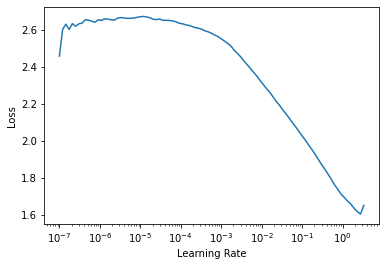

In [33]:
learn.lr_find()

In [34]:
learn.fit_one_cycle(3, lr_max=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.220420,0.186110,0.940100,07:49
1,0.132271,0.068137,0.977900,06:09
2,0.080429,0.041402,0.987000,01:44
